Stage 1: Data Capture & Loading

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("retail_sales_2024.csv", parse_dates=["timestamp"])


Stage 2: Data Cleaning & Validation

In [5]:
df.head()

,transaction_id,timestamp,store_id,product_id,product_name,category,quantity,unit_price,payment_type,customer_id,inventory_on_hand
0,T00001,2024-01-01 00:00:00,Store_4,P030,Product_P019,Clothing,4,1392.04,UPI,C1792,34
1,T00002,2024-01-01 01:00:00,Store_5,P023,Product_P024,Electronics,4,1959.11,Card,C1518,187
2,T00003,2024-01-01 02:00:00,Store_3,P016,Product_P026,Groceries,1,510.11,Card,C1091,118
3,T00004,2024-01-01 03:00:00,Store_5,P014,Product_P045,Clothing,3,378.62,Card,C1360,104
4,T00005,2024-01-01 04:00:00,Store_5,P010,Product_P028,Electronics,2,716.94,UPI,C1945,62


In [7]:
df.shape

(5000, 11)

In [9]:
# Check missing values
print(df.isnull().sum())


transaction_id       0
timestamp            0
store_id             0
product_id           0
product_name         0
category             0
quantity             0
unit_price           0
payment_type         0
customer_id          0
inventory_on_hand    0
dtype: int64


In [13]:
# Create revenue column
df["revenue"] = df["quantity"] * df["unit_price"]

# Now you can use it
print("Total Revenue:", df["revenue"].sum())
print("Unique Customers:", df["customer_id"].nunique())


Total Revenue: 12727872.75
Unique Customers: 994


Stage 3: Exploratory Data Analysis (EDA)

In [15]:
fact_sales_daily = (
    df.groupby([df["timestamp"].dt.date, "store_id", "product_id"])
    .agg(total_qty=("quantity", "sum"),
         total_revenue=("revenue", "sum"))
    .reset_index()
    .rename(columns={"timestamp": "sale_date"})
)

print(fact_sales_daily.head())


    sale_date store_id product_id  total_qty  total_revenue
0  2024-01-01  Store_1       P006          3        5782.59
1  2024-01-01  Store_1       P037          1         312.58
2  2024-01-01  Store_2       P007          4        1482.32
3  2024-01-01  Store_2       P013          3        5840.97
4  2024-01-01  Store_2       P029          3        3763.17


In [17]:
dim_products = df[["product_id", "product_name", "category", "unit_price"]].drop_duplicates()
print(dim_products.head())

  product_id  product_name     category  unit_price
0       P030  Product_P019     Clothing     1392.04
1       P023  Product_P024  Electronics     1959.11
2       P016  Product_P026    Groceries      510.11
3       P014  Product_P045     Clothing      378.62
4       P010  Product_P028  Electronics      716.94


In [19]:
dim_stores = df[["store_id"]].drop_duplicates()
print(dim_stores.head())

   store_id
0   Store_4
1   Store_5
2   Store_3
5   Store_2
18  Store_1


Stage 5: Inventory Snapshot

In [21]:
low_inventory = df[df["inventory_on_hand"] < 20][["product_id", "product_name", "inventory_on_hand"]]
print(low_inventory.head())


    product_id  product_name  inventory_on_hand
35        P023  Product_P003                 12
42        P047  Product_P050                 13
55        P050  Product_P031                 12
90        P032  Product_P049                 14
131       P003  Product_P010                 19


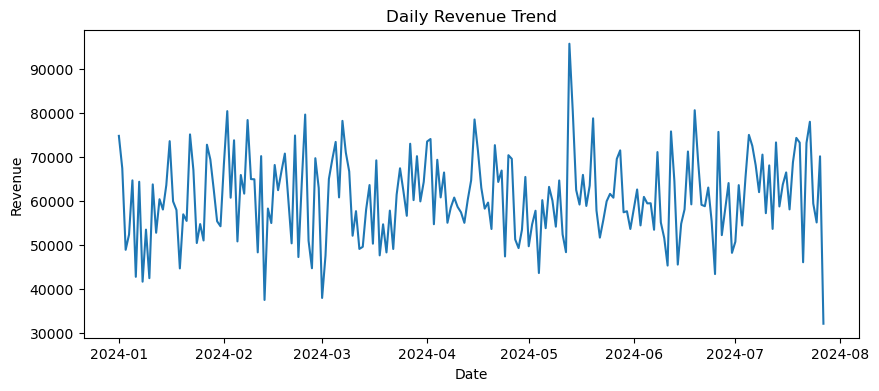

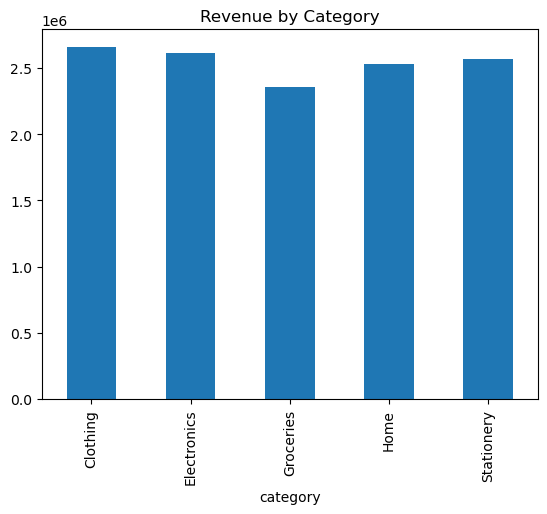

In [23]:
import matplotlib.pyplot as plt

# Sales trend
daily_sales = df.groupby(df["timestamp"].dt.date)["revenue"].sum()
daily_sales.plot(figsize=(10,4), title="Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# Revenue by category
df.groupby("category")["revenue"].sum().plot(kind="bar", title="Revenue by Category")
plt.show()


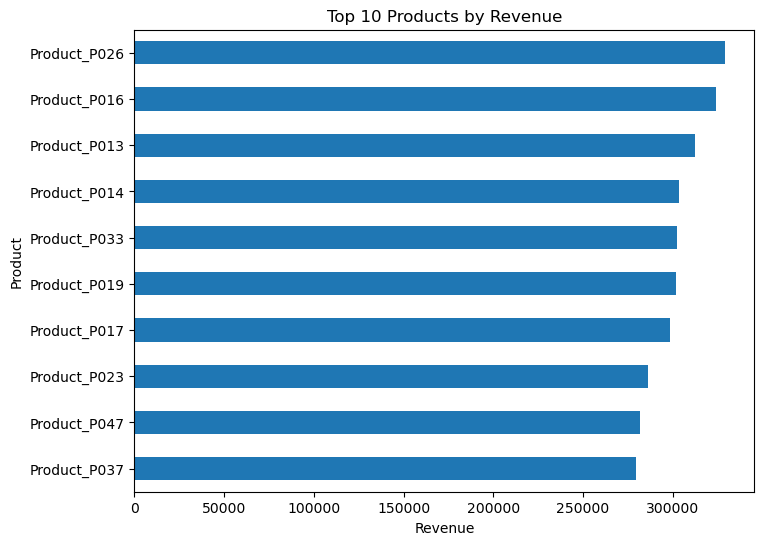

In [27]:
# Top 10 products by revenue
top_products = df.groupby("product_name")["revenue"].sum().sort_values(ascending=False).head(10)

top_products.plot(kind="barh", figsize=(8,6), title="Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Highest on top
plt.show()


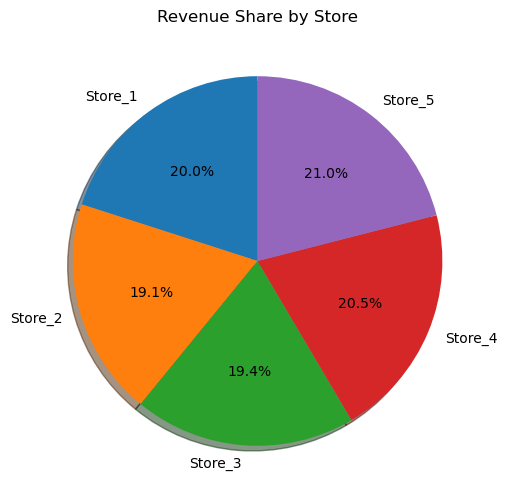

In [31]:
store_revenue = df.groupby("store_id")["revenue"].sum()

plt.figure(figsize=(6,6))
plt.pie(store_revenue, labels=store_revenue.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Revenue Share by Store")
plt.show()
